In [1]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 18.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("computer-vision-kbzhg").project("brain_tumor-gxibq")
version = project.version(1)
dataset = version.download("yolov8")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Brain_Tumor-1 in yolov8:: 100%|██████████| 27904/27904 [00:03<00:00, 8872.17it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
print(dataset.location)

/kaggle/working/Brain_Tumor-1


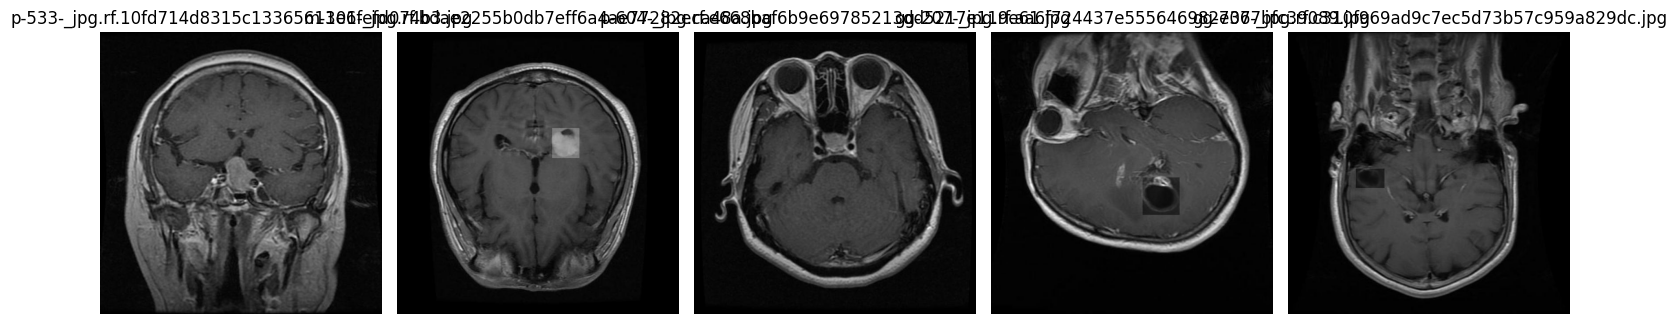

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt
train_dataset_path = os.path.join(dataset.location, "train", "images")

# Get a list of all image files in the training directory
image_files = [f for f in os.listdir(train_dataset_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Number of images to display
num_images_to_show = min(5, len(image_files))

# Display the images
plt.figure(figsize=(15, 5 * num_images_to_show))
for i in range(num_images_to_show):
    image_path = os.path.join(train_dataset_path, image_files[i])
    try:
        img = Image.open(image_path)
        plt.subplot(1, num_images_to_show, i + 1)
        plt.imshow(img)
        plt.title(image_files[i])
        plt.axis('off')  # Turn off axis labels and ticks
    except Exception as e:
        print(f"Error loading image {image_files[i]}: {e}")

plt.tight_layout()
plt.show()

In [10]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6170.1/8062.4 GB disk)


In [16]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")
results = model.train(data='/kaggle/working/Brain_Tumor-1/data.yaml', epochs=30,patience=10)

100%|██████████| 21.5M/21.5M [00:00<00:00, 134MB/s] 


Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/Brain_Tumor-1/data.yaml, epochs=30, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 70.5MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Brain_Tumor-1/train/labels... 11767 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11767/11767 [00:09<00:00, 1193.34it/s]


train: New cache created: /kaggle/working/Brain_Tumor-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /kaggle/working/Brain_Tumor-1/valid/labels... 1450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1450/1450 [00:01<00:00, 1139.70it/s]

val: New cache created: /kaggle/working/Brain_Tumor-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.78G     0.7334      1.312      1.027         12        640: 100%|██████████| 736/736 [03:12<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:12<00:00,  3.57it/s]

                   all       1450       1467      0.822      0.764      0.874      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.54G     0.7076     0.8202      1.002         11        640: 100%|██████████| 736/736 [03:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]

                   all       1450       1467      0.848      0.781      0.885       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.56G     0.6913     0.7596     0.9947         14        640: 100%|██████████| 736/736 [03:07<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.84it/s]

                   all       1450       1467      0.874      0.811      0.906      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      4.56G     0.6606     0.6921     0.9813         14        640: 100%|██████████| 736/736 [03:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.91it/s]

                   all       1450       1467      0.877      0.865      0.924      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.56G     0.6328     0.6327     0.9688          9        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.94it/s]

                   all       1450       1467      0.896      0.866       0.93      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.56G     0.5918     0.5766     0.9508          9        640: 100%|██████████| 736/736 [03:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.92it/s]

                   all       1450       1467      0.907      0.885      0.936      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.56G     0.5816     0.5451     0.9509         13        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]

                   all       1450       1467      0.912      0.887      0.951      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.56G     0.5752     0.5188     0.9481         14        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.91it/s]

                   all       1450       1467      0.921      0.906       0.96      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.56G     0.5597     0.5011     0.9395         13        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.89it/s]

                   all       1450       1467      0.923      0.914      0.962      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.56G     0.5436       0.48     0.9363         15        640: 100%|██████████| 736/736 [03:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.99it/s]

                   all       1450       1467      0.929      0.928      0.969      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.56G     0.5287     0.4494     0.9286          9        640: 100%|██████████| 736/736 [03:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.96it/s]

                   all       1450       1467      0.938      0.932      0.968      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.56G     0.5269     0.4388     0.9295          8        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.94it/s]

                   all       1450       1467      0.941      0.914      0.967      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.56G     0.5169     0.4248     0.9202         10        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.90it/s]

                   all       1450       1467      0.951      0.928      0.971      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      4.56G     0.5138     0.4136     0.9208          9        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.94it/s]

                   all       1450       1467      0.955      0.924      0.974      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.56G     0.4953     0.4002     0.9127         10        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.92it/s]

                   all       1450       1467      0.946      0.935      0.974      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.56G     0.4929     0.3847     0.9136          9        640: 100%|██████████| 736/736 [03:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.93it/s]

                   all       1450       1467      0.963      0.941      0.976      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.56G     0.4891     0.3763     0.9096         13        640: 100%|██████████| 736/736 [03:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.90it/s]

                   all       1450       1467      0.961      0.949      0.981      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.56G     0.4762     0.3638     0.9076          9        640: 100%|██████████| 736/736 [03:05<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.93it/s]

                   all       1450       1467      0.967      0.947      0.978      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.56G      0.474     0.3543     0.9041         17        640: 100%|██████████| 736/736 [03:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.96it/s]

                   all       1450       1467      0.959      0.953      0.982      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.56G     0.4659     0.3393     0.9009         19        640: 100%|██████████| 736/736 [03:07<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.95it/s]

                   all       1450       1467      0.965       0.95       0.98      0.896


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.56G      0.433     0.2742     0.8809          7        640: 100%|██████████| 736/736 [03:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.94it/s]

                   all       1450       1467      0.975      0.948      0.982      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.56G     0.4213     0.2571      0.876          7        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.85it/s]

                   all       1450       1467      0.978      0.958      0.984      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.56G     0.4127     0.2468     0.8699          7        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.87it/s]

                   all       1450       1467      0.977      0.949      0.983      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.56G     0.4022     0.2331     0.8643          7        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.98it/s]

                   all       1450       1467       0.97      0.951      0.983      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.56G     0.3917     0.2236     0.8571          7        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.91it/s]

                   all       1450       1467      0.978      0.958      0.983      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.56G     0.3818     0.2154     0.8546          7        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.86it/s]

                   all       1450       1467      0.979      0.961      0.984      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.56G     0.3728     0.2036     0.8511          7        640: 100%|██████████| 736/736 [03:07<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.84it/s]

                   all       1450       1467      0.968      0.963      0.985       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.56G     0.3627     0.1963     0.8482          7        640: 100%|██████████| 736/736 [03:07<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.88it/s]

                   all       1450       1467      0.982      0.957      0.985      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.56G     0.3532     0.1871     0.8406          7        640: 100%|██████████| 736/736 [03:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.91it/s]

                   all       1450       1467      0.977      0.965      0.987      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.56G     0.3458     0.1835      0.838          7        640: 100%|██████████| 736/736 [03:06<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:11<00:00,  3.93it/s]

                   all       1450       1467      0.984      0.956      0.985      0.914



30 epochs completed in 1.661 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.52it/s]


                   all       1450       1467      0.977      0.965      0.987      0.915
          glioma-tumor        472        487      0.966      0.922      0.974       0.88
      meningioma-tumor        522        524      0.987      0.993      0.993      0.952
       pituitary-tumor        456        456      0.979       0.98      0.993      0.913


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 4.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


In [8]:
!yolo task=detect \
mode=predict \
model=/kaggle/working/runs/detect/train/weights/best.pt \
conf=0.50 \
source={dataset.location}/test/images

Ultralytics 8.3.103 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs

image 1/729 /kaggle/working/Brain_Tumor-1/test/images/gg-101-_jpg.rf.bb6d64d59dba427b2044804efe2161cc.jpg: 640x640 (no detections), 16.2ms
image 2/729 /kaggle/working/Brain_Tumor-1/test/images/gg-103-_jpg.rf.ecbff257c111cc67140f4bfe71923de4.jpg: 640x640 1 glioma-tumor, 16.2ms
image 3/729 /kaggle/working/Brain_Tumor-1/test/images/gg-109-_jpg.rf.eaeb43cc900e04d45d3e439509bdde87.jpg: 640x640 1 glioma-tumor, 16.3ms
image 4/729 /kaggle/working/Brain_Tumor-1/test/images/gg-11-_jpg.rf.8257adbcd7926162ffade726afb76198.jpg: 640x640 (no detections), 16.2ms
image 5/729 /kaggle/working/Brain_Tumor-1/test/images/gg-113-_jpg.rf.cd1083c840a4702cde909efd79afff4c.jpg: 640x640 1 glioma-tumor, 16.2ms
image 6/729 /kaggle/working/Brain_Tumor-1/test/images/gg-116-_jpg.rf.02380162231b1249fd89fb07a19997ee.jpg: 640x640 1 glioma-tumor, 16.2ms
image

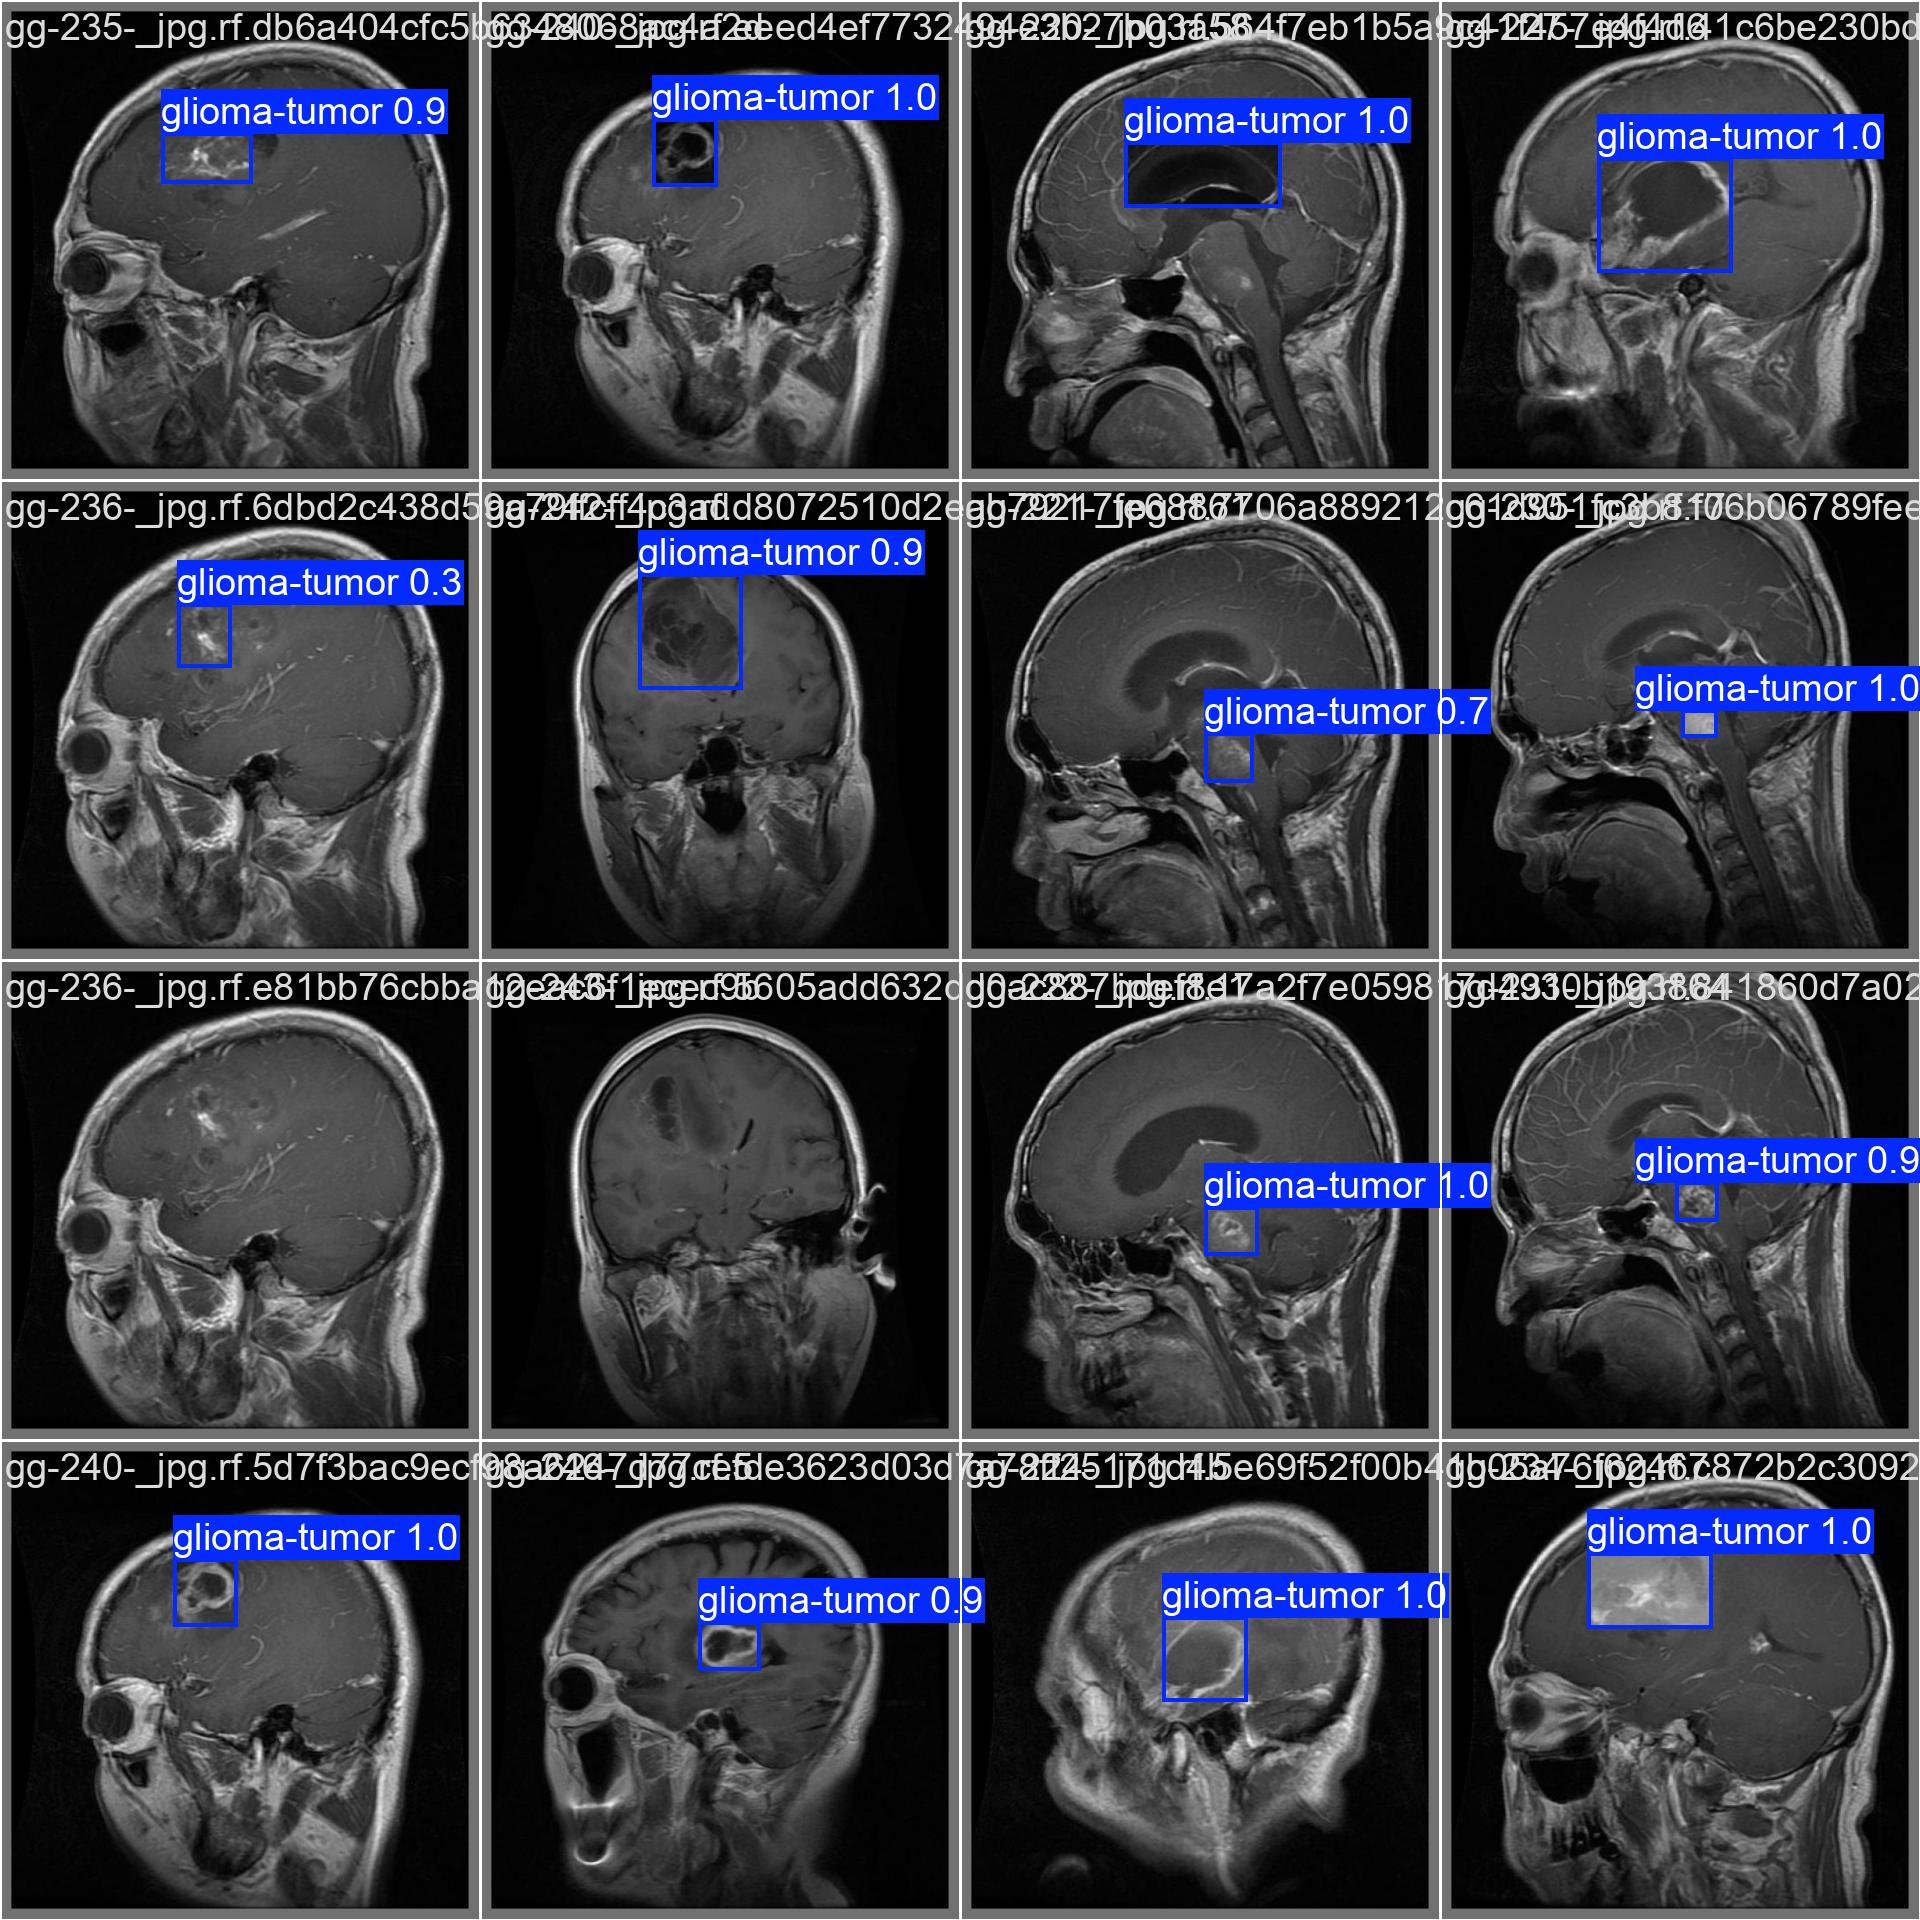

None


In [17]:
from IPython.display import display, Image

print(display(Image("/kaggle/working/runs/detect/train/val_batch2_pred.jpg")))

In [18]:
from ultralytics import YOLO
best_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
results = best_model.val()

Ultralytics 8.3.104 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/working/Brain_Tumor-1/valid/labels.cache... 1450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1450/1450 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 91/91 [00:18<00:00,  4.97it/s]


                   all       1450       1467      0.977      0.965      0.987      0.915
          glioma-tumor        472        487      0.966      0.922      0.974      0.882
      meningioma-tumor        522        524      0.987      0.993      0.993      0.952
       pituitary-tumor        456        456      0.979       0.98      0.993      0.912


invalid value encountered in less
invalid value encountered in less


Speed: 0.4ms preprocess, 8.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val


In [19]:
print(results.box.map50)
print(results.box.map75)
print(results.box.map)

0.9866321524451079
0.9531907872351265
0.9150226717859524
